In [ ]:
!pip install git+https://github.com/pulse2percept/pulse2percept
import pulse2percept as p2p
import cv2
import numpy as np
from matplotlib import pyplot as plt


  Cloning https://github.com/pulse2percept/pulse2percept to /tmp/pip-req-build-c03n247y
  Running command git clone -q https://github.com/pulse2percept/pulse2percept /tmp/pip-req-build-c03n247y


ImageStimulus(data=<(5829488, 1) np.ndarray>, dt=0.001, 
              electrodes=<(5829488,) np.ndarray>, 
              img_shape=(1022, 1426, 4), 
              is_charge_balanced=False, metadata=dict, 
              shape=(5829488, 1), time=None)


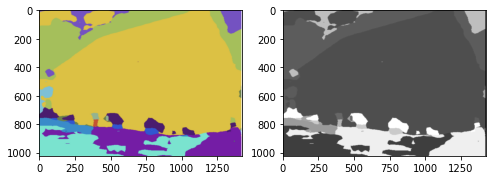

In [ ]:
# logo = p2p.stimuli.LogoBVL() # bg logo

logo = p2p.stimuli.ImageStimulus("/content/test.jpg")
print(logo)

logo_gray = logo.invert().rgb2gray()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
logo.plot(ax=ax1)
logo_gray.plot(ax=ax2)

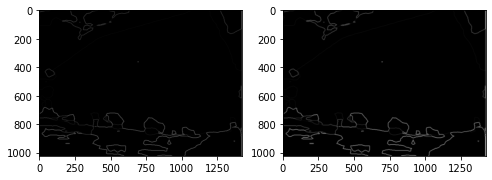

In [ ]:
from skimage.morphology import dilation
logo_edge = logo_gray.filter('scharr')

logo_dilate = logo_edge.apply(dilation)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
# Edges extracted with the Scharr operator:
logo_edge.plot(ax=ax1)
# Edges thickened with dilation:
logo_dilate.plot(ax=ax2)

transform <function ScoreboardSpatial.dva2ret at 0x7fe22a5e3830>


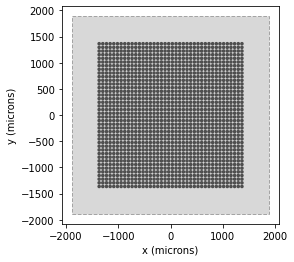

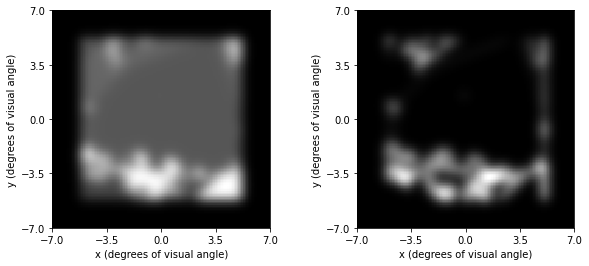

In [ ]:
# Simulate only what we need (14x14 deg sampled at 0.1 deg):
model = p2p.models.ScoreboardModel(xrange=(-7, 7), yrange=(-7, 7), xystep=0.1)
model.build()

implant = p2p.implants.AlphaAMS()

# Show the visual field we're simulating (dashed lines) atop the implant:
model.plot()
implant.plot()

implant.stim = logo_gray.resize(implant.shape)
percept_gray = model.predict_percept(implant)
implant.stim = logo_dilate.trim().resize(implant.shape)
percept_dilate = model.predict_percept(implant)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
percept_gray.plot(ax=ax1)
percept_dilate.plot(ax=ax2)

1426 1022
481
947


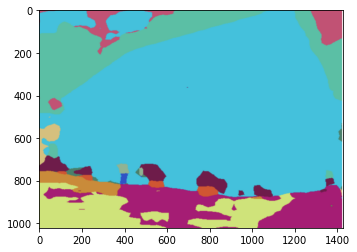

In [ ]:
img = cv2.imread("/content/test.jpg")
# print(img.shape)
plt.imshow(img)

length = len(img[0])
height = len(img)
print(length,height)
from collections import defaultdict

# key = sumRGB, val = list of pixel tuples [(1,1),(2,2)]
pixel_vals = defaultdict(list)

for i in range(0,height,height//39):
  for j in range(0,length,length//39):
    key = sum(img[i][j])
    val = (i//(height//39),j//(length//39))
    pixel_vals[key].append(val)

# print(pixel_vals)

# check the color that most electrodes are mapped to
color_idx = -1
most_electrodes = 0
for k,v in pixel_vals.items():
  if len(v)>most_electrodes:
    most_electrodes = len(v)
    color_idx = k
print(color_idx)
print(len(pixel_vals[color_idx]))
# enable the implant in mask_1

def get_electrode_name(l):
  names = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z',26:'AA',27:'AB',28:'AC',29:'AD',30:'AE',31:'AF',32:'AG',33:'AH',34:'AI',35:'AJ',36:'AK',37:'AL',38:'AM',39:'AN'}
  d = {}
  for e in l:
    d[names[e[0]]+str(e[1]+1)] = 1
  return d

mask_1 = get_electrode_name(pixel_vals[color_idx])


# print(mask_1[:10])

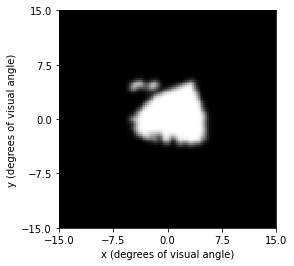

In [ ]:

implant = p2p.implants.AlphaAMS()
implant.stim=mask_1
implant.plot()

# Set up the model and build it:
model = p2p.models.ScoreboardModel()
model.build()

# Predict the percept and plot it:
percept = model.predict_percept(implant)
percept.plot()